In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection

In [2]:
dataset = pd.read_csv('dataset.csv', delimiter=';')
dataset

,gender,age,education,ethnicity,impulsive,sensation,c_score,e_score,n_score,o_score,was_addicted
0,False,38,5,Mixed-White/Asian,-0.21712,-1.18084,-0.00665,-0.57545,0.31287,-0.58331,False
1,True,28,8,White,-0.71126,-0.21575,-0.14277,1.93886,-0.67825,1.43533,True
2,True,36,5,White,-1.37983,0.40148,-1.01450,0.80523,-0.46725,-0.84732,False
3,False,18,7,White,-1.37983,-1.18084,0.58489,-0.80615,-0.14882,-0.01928,False
4,False,37,8,White,-0.21712,-0.21575,1.30612,-1.63340,0.73545,-0.45174,False
...,...,...,...,...,...,...,...,...,...,...,...
1880,False,21,4,White,0.88113,1.92173,-1.13788,1.74091,-1.19430,1.88511,True
1881,True,23,4,White,0.88113,0.76540,-1.51840,1.74091,-0.24649,0.58331,True
1882,False,34,6,White,0.52975,-0.52593,-1.38502,-1.37639,1.13281,-1.27553,True
1883,False,25,4,White,1.29221,1.22470,-2.57309,-1.92173,0.91093,0.29338,True


In [3]:
dataset['ethnicity'] = dataset['ethnicity'].astype('category').cat.codes.to_numpy()
dataset['gender'] = dataset['gender'] * 2 - 1
dataset

,gender,age,education,ethnicity,impulsive,sensation,c_score,e_score,n_score,o_score,was_addicted
0,-1,38,5,3,-0.21712,-1.18084,-0.00665,-0.57545,0.31287,-0.58331,False
1,1,28,8,6,-0.71126,-0.21575,-0.14277,1.93886,-0.67825,1.43533,True
2,1,36,5,6,-1.37983,0.40148,-1.01450,0.80523,-0.46725,-0.84732,False
3,-1,18,7,6,-1.37983,-1.18084,0.58489,-0.80615,-0.14882,-0.01928,False
4,-1,37,8,6,-0.21712,-0.21575,1.30612,-1.63340,0.73545,-0.45174,False
...,...,...,...,...,...,...,...,...,...,...,...
1880,-1,21,4,6,0.88113,1.92173,-1.13788,1.74091,-1.19430,1.88511,True
1881,1,23,4,6,0.88113,0.76540,-1.51840,1.74091,-0.24649,0.58331,True
1882,-1,34,6,6,0.52975,-0.52593,-1.38502,-1.37639,1.13281,-1.27553,True
1883,-1,25,4,6,1.29221,1.22470,-2.57309,-1.92173,0.91093,0.29338,True


In [4]:
x = dataset.drop(columns=['was_addicted'], inplace=False).to_numpy()
y = dataset['was_addicted'].to_numpy() * 1
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(x, y, test_size=0.33, random_state=123)

In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train_x)
preprocessed_train_x = scaler.transform(train_x)
preprocessed_test_x = scaler.transform(test_x)
preprocessed_train_x

array([[ 1.02243869, -0.55831635, -2.21916176, ...,  1.09935668,
        -1.07850292, -1.88126923],
       [ 1.02243869, -0.9514179 , -0.54584043, ...,  0.30153614,
         0.03743297, -0.04260614],
       [-0.97805375, -0.87279759, -1.1036142 , ...,  0.30153614,
        -1.07850292,  1.8920379 ],
       ...,
       [-0.97805375, -0.00797417,  1.68525469, ..., -0.9774102 ,
        -2.2654395 , -0.75168474],
       [ 1.02243869,  1.09271019,  0.01193335, ...,  0.14611983,
        -0.36035822, -0.75168474],
       [-0.97805375, -1.10865852, -0.54584043, ..., -0.9774102 ,
         0.13265394, -1.15981713]])

In [41]:
from tensorflow import keras
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Dropout(0.25))
model.add(layers.Dense(16, activation='swish'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(32, activation='swish'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(16, activation='swish'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False), optimizer=keras.optimizers.Nadam(learning_rate=0.01), metrics=[keras.metrics.AUC()])

In [47]:
history = model.fit(preprocessed_train_x, train_y, epochs=15)

Epoch 1/15
40/40 [==============================] - 0s 6ms/step - loss: 0.5694 - auc: 0.7636
Epoch 2/15
40/40 [==============================] - 0s 6ms/step - loss: 0.5783 - auc: 0.7589
Epoch 3/15
40/40 [==============================] - 0s 6ms/step - loss: 0.5769 - auc: 0.7584
Epoch 4/15
40/40 [==============================] - 0s 6ms/step - loss: 0.5620 - auc: 0.7691
Epoch 5/15
40/40 [==============================] - 0s 6ms/step - loss: 0.5859 - auc: 0.7427
Epoch 6/15
40/40 [==============================] - 0s 6ms/step - loss: 0.5787 - auc: 0.7582
Epoch 7/15
40/40 [==============================] - 0s 6ms/step - loss: 0.5626 - auc: 0.7729
Epoch 8/15
40/40 [==============================] - 0s 6ms/step - loss: 0.5831 - auc: 0.7559
Epoch 9/15
40/40 [==============================] - 0s 6ms/step - loss: 0.5831 - auc: 0.7481
Epoch 10/15
40/40 [==============================] - 0s 6ms/step - loss: 0.5894 - auc: 0.7405
Epoch 11/15
40/40 [==============================] - 0s 6ms/step - lo

In [48]:
predictions = model.predict(preprocessed_test_x)

20/20 [==============================] - 0s 632us/step


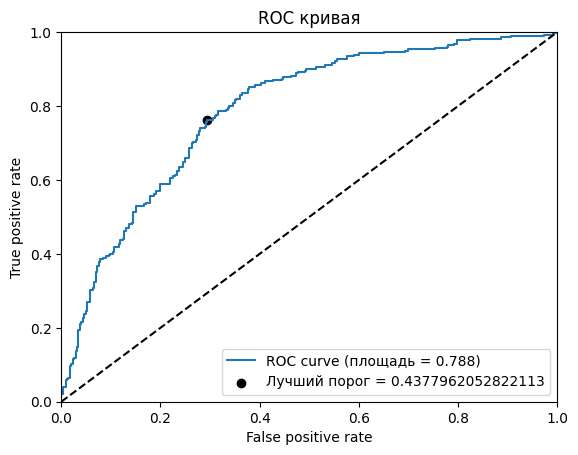

In [51]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

fpr, tpr, thresholds = metrics.roc_curve(test_y, predictions)
best_threshold_index = np.argmin(np.sqrt(fpr**2 + (tpr-1)**2))
roc_auc = metrics.auc(fpr, tpr)
threshold = thresholds[best_threshold_index]

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (площадь = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC кривая')
plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], marker='o', color='black', label=f'Лучший порог = {threshold}')
plt.legend(loc="lower right")


In [52]:
binary_predictions = (predictions > threshold) * 1
print(f'accuracy: {metrics.accuracy_score(test_y, binary_predictions)}, precision: {metrics.precision_score(test_y, binary_predictions)}, recall = {metrics.recall_score(test_y, binary_predictions)}, roc auc = {metrics.roc_auc_score(test_y, predictions)}')
print('confusion matrix:\n', metrics.confusion_matrix(test_y, binary_predictions))

accuracy: 0.7287319422150883, precision: 0.6730769230769231, recall = 0.7581227436823105, roc auc = 0.7878800525865487
confusion matrix:
 [[244 102]
 [ 67 210]]
